In [1]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')



# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import xlrd
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import nltk

In [19]:
#!pip install xlrd

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
stop= stopwords.words('english')
stop.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [5]:
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    if doc is not None:
      stop_free = " ".join([i for i in str(doc).lower().split() if i not in stop])
      punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
      normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
      return normalized
    else:
      return doc

In [7]:
file_path = ("elecworker.xlsx")
data = pd.read_excel(file_path, 
                              sheet_name = 'All common workers from both ')

In [19]:
data['Description'].isnull().value_counts()

False    636
Name: Description, dtype: int64

In [14]:
data.Description.dropna()

0      We are a small electrical business with decade...
1      Need a qualified electrician/heating and cooli...
2      Years in business: 36\nNumber of employees: 3\...
3      All types of Electrical Works\nIndustrial, Com...
4                                                       
                             ...                        
631    Over 30 years ICT experience. Cisco certified....
632    Hello,\nI have plenty of experience in DIY stu...
633    Hi I‚Äôm Jarrod. \nI am a refrigeration and ai...
634    I own a local, family owned electrical busines...
635    [Content Moderated] is a registered electrical...
Name: Description, Length: 636, dtype: object

In [25]:
data[(data.Description == ' ')].index.tolist()

[4,
 5,
 10,
 22,
 25,
 35,
 50,
 54,
 56,
 57,
 58,
 64,
 76,
 82,
 88,
 90,
 103,
 129,
 130,
 141,
 143]

In [26]:
data = data.drop([4,
 5,
 10,
 22,
 25,
 35,
 50,
 54,
 56,
 57,
 58,
 64,
 76,
 82,
 88,
 90,
 103,
 129,
 130,
 141,
 143])

In [45]:
data

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,Address,Licence Number Extracted,Reviews,Ratings,Description,Website
0,Chad Elliott,"Boronia, VIC",9353,3,5,We are a small electrical business with decade...,Service Seek
1,Hercules,"Murrumbeena, VIC",8632,9,4,Need a qualified electrician/heating and cooli...,Service Seek
2,John,"Strathmore, VIC",8328,1,5,Years in business: 36\nNumber of employees: 3\...,Service Seek
3,Laurie,"Wheelers Hill, VIC",8173,,,"All types of Electrical Works\nIndustrial, Com...",Service Seek
6,Peter Orlando,"Keilor Park, VIC",63151,18,5,Contractor's Lic # 30614,Service Seek
...,...,...,...,...,...,...,...
631,Wing fu C.,"Bayswater VIC, Australia",,51,5,Over 30 years ICT experience. Cisco certified....,Airtasker
632,Bharat S.,"Lynbrook VIC, Australia",,110,4.8,"Hello,\nI have plenty of experience in DIY stu...",Airtasker
633,Jarrod M.,"St Helena VIC, Australia",,,,Hi I‚Äôm Jarrod. \nI am a refrigeration and ai...,Airtasker
634,Brendan G.,"Officer VIC, Australia",NaN,70,5,"I own a local, family owned electrical busines...",Airtasker


# Tokenize Sentences and Clean

In [9]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [46]:
data_list = data.Description.values.tolist()
data_list

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['We are a small electrical business with decades of experience who always make sure the project is carried out exactly how the customer is hoping for.\nlet us help you design your next project and get it done right!\nwe are also a very diverse team and can tackle a vast variety of jobs to make sure everything in-between gets done.',
 'Need a qualified electrician/heating and cooling expert in the Melbourne Metro area?\nWith over 27 year‚Äôs experience, we provide more than a service; we provide solutions. Highly qualified, fully accredited and insured.',
 'Years in business: 36\nNumber of employees: 3\nWe specialise in:\nAll types of electrical works\nSolar supply and install\nIntercoms\nUnderground electrical works',
 'All types of Electrical Works\nIndustrial, Commercial, Domestic\nRenewable Energy;\nClean Energy Council Accredited PV Solar Design & Install\nStand-Alone Power System, On/Off Grid, Hybrid & Battery Backup\nEnergy Audits,\nLED Energy Saving Lighting retrofits,\nHome Au

In [28]:
electric_data = data['Description']
doc_clean = [clean(doc).split() for doc in electric_data] 
dictionary = corpora.Dictionary(doc_clean) 
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [36]:
base_model_lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.ldamodel.LdaModel(corpus = corpus, 
                          id2word = dictionary,
                          num_topics = 4,
                          passes = 50)

In [64]:
ldamodel[corpus]

create four topics for lda model

In [37]:
pprint(ldamodel.print_topics())

[(0,
  '0.011*"work" + 0.006*"experience" + 0.005*"installation" + 0.005*"car" + '
  '0.005*"job" + 0.005*"content" + 0.004*"system" + 0.004*"year" + '
  '0.004*"tool" + 0.004*"quality"'),
 (1,
  '0.042*"electrical" + 0.018*"electrician" + 0.018*"work" + 0.016*"year" + '
  '0.015*"service" + 0.013*"experience" + 0.010*"qualified" + 0.008*"job" + '
  '0.008*"contractor" + 0.007*"domestic"'),
 (2,
  '0.023*"x000d" + 0.015*"job" + 0.009*"repair" + 0.007*"time" + 0.006*"work" '
  '+ 0.006*"service" + 0.005*"help" + 0.005*"task" + 0.004*"one" + '
  '0.004*"star"'),
 (3,
  '0.032*"electrical" + 0.021*"installation" + 0.020*"‚ä¢" + 0.020*"service" + '
  '0.014*"lighting" + 0.012*"power" + 0.012*"system" + 0.012*"work" + '
  '0.012*"home" + 0.010*"upgrade"')]


In [47]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6990,"electrical, installation, ‚ä¢, service, lighti...","[small, electrical, business, decade, experien..."
1,1,1.0,0.9617,"electrical, electrician, work, year, service, ...","[qualified, electricianheating, cooling, exper..."
2,2,1.0,0.6676,"electrical, electrician, work, year, service, ...","[year, business, 36, number, employee, 3, spec..."
3,3,3.0,0.9916,"electrical, installation, ‚ä¢, service, lighti...","[type, electrical, work, industrial, commercia..."
4,4,0.0,0.6639,"work, experience, installation, car, job, cont...","[contractor, lic, 30614]"
5,5,1.0,0.9807,"electrical, electrician, work, year, service, ...","[fully, licensed, insured, grade, electrician,..."
6,6,3.0,0.9850,"electrical, installation, ‚ä¢, service, lighti...","[licenced, registered, insured, electrical, co..."
7,7,1.0,0.9568,"electrical, electrician, work, year, service, ...","[slape, electric, young, growing, electrical, ..."
8,8,1.0,0.9514,"electrical, electrician, work, year, service, ...","[professional, insured, electrical, service, s..."
9,9,1.0,0.7530,"electrical, electrician, work, year, service, ...","[created, genuine, passion, electrical, indust..."


 In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

# Frequency Distribution of Word Counts in Documents

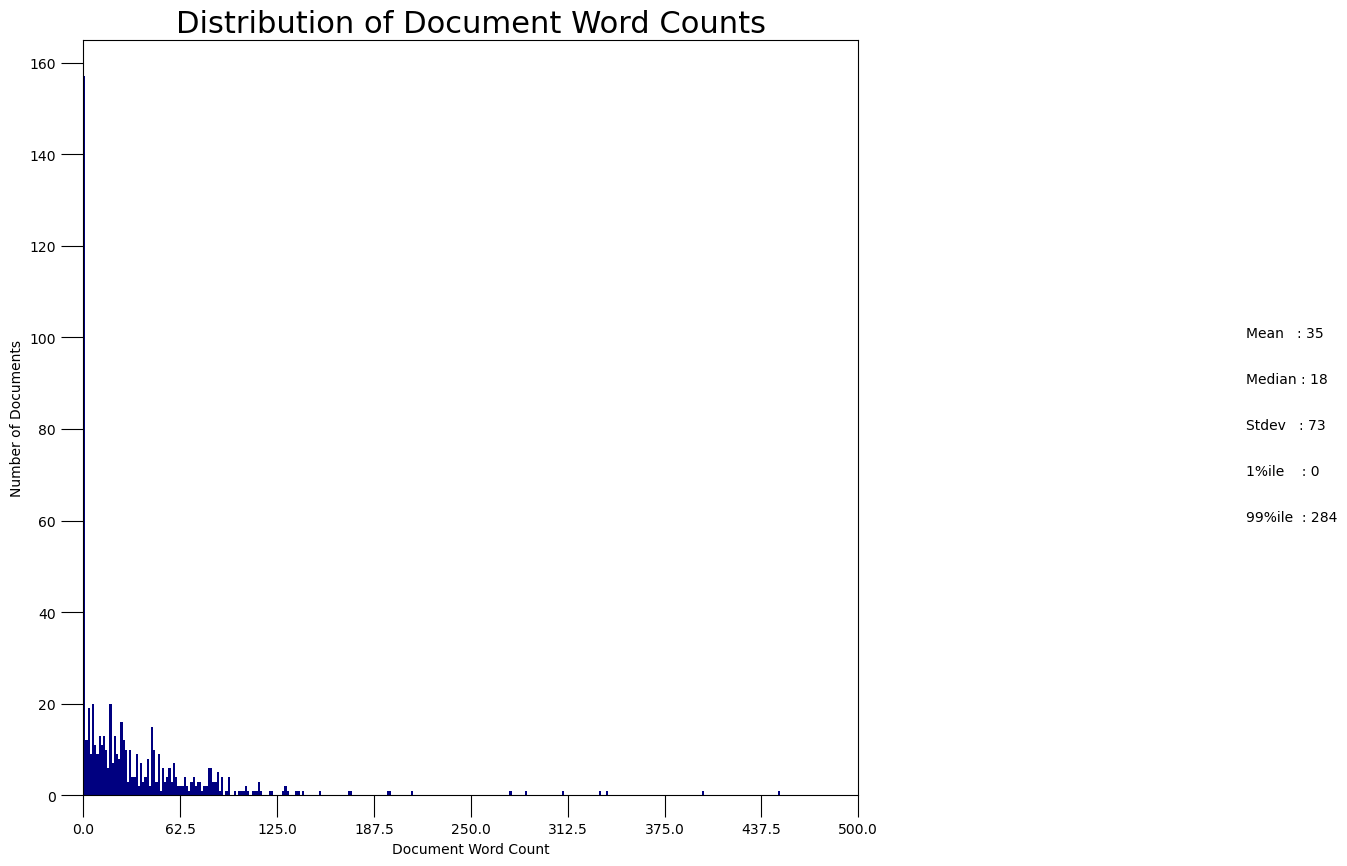

In [31]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,10), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,500,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


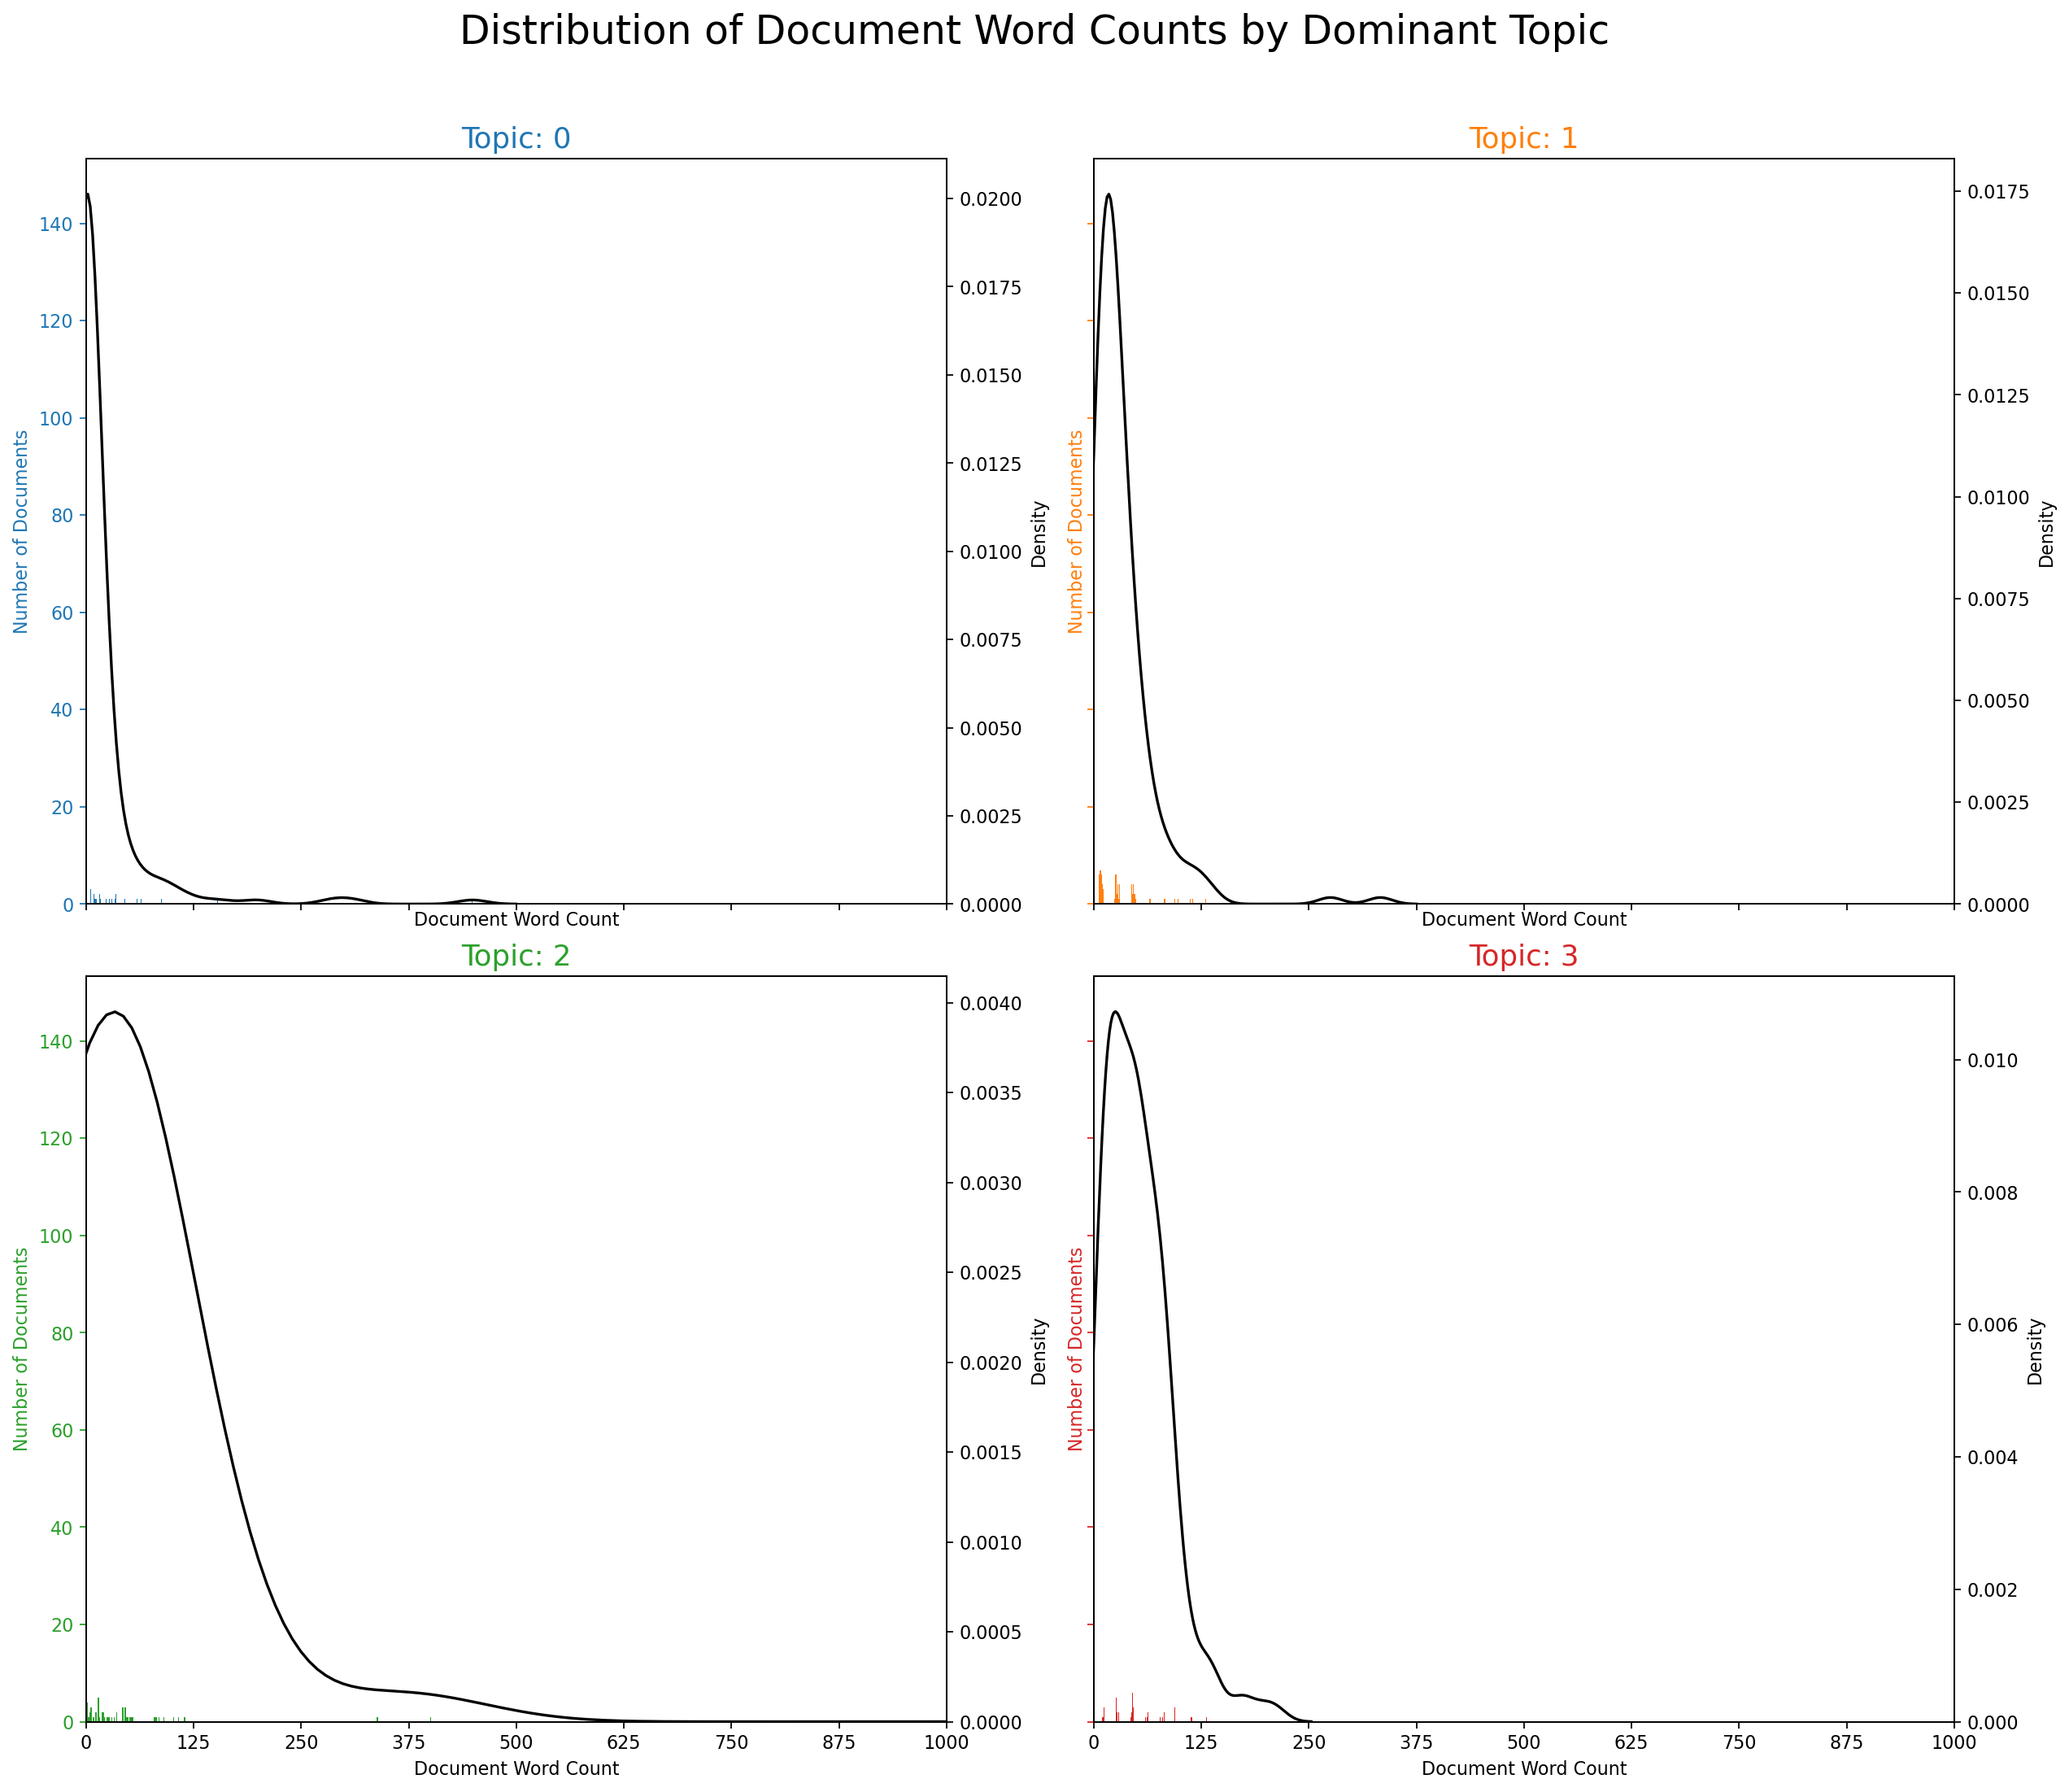

In [50]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

In [33]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more

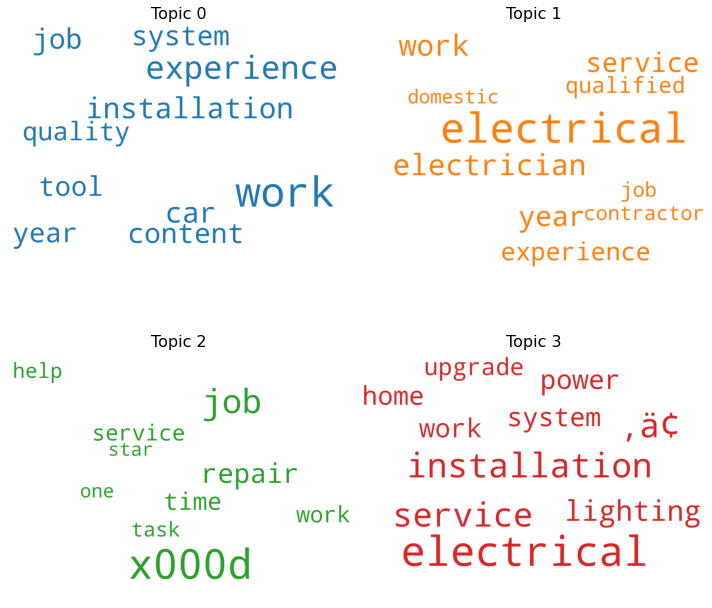

In [40]:
cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# word counts for topic keywords

<ipython-input-39-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-39-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-39-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-39-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


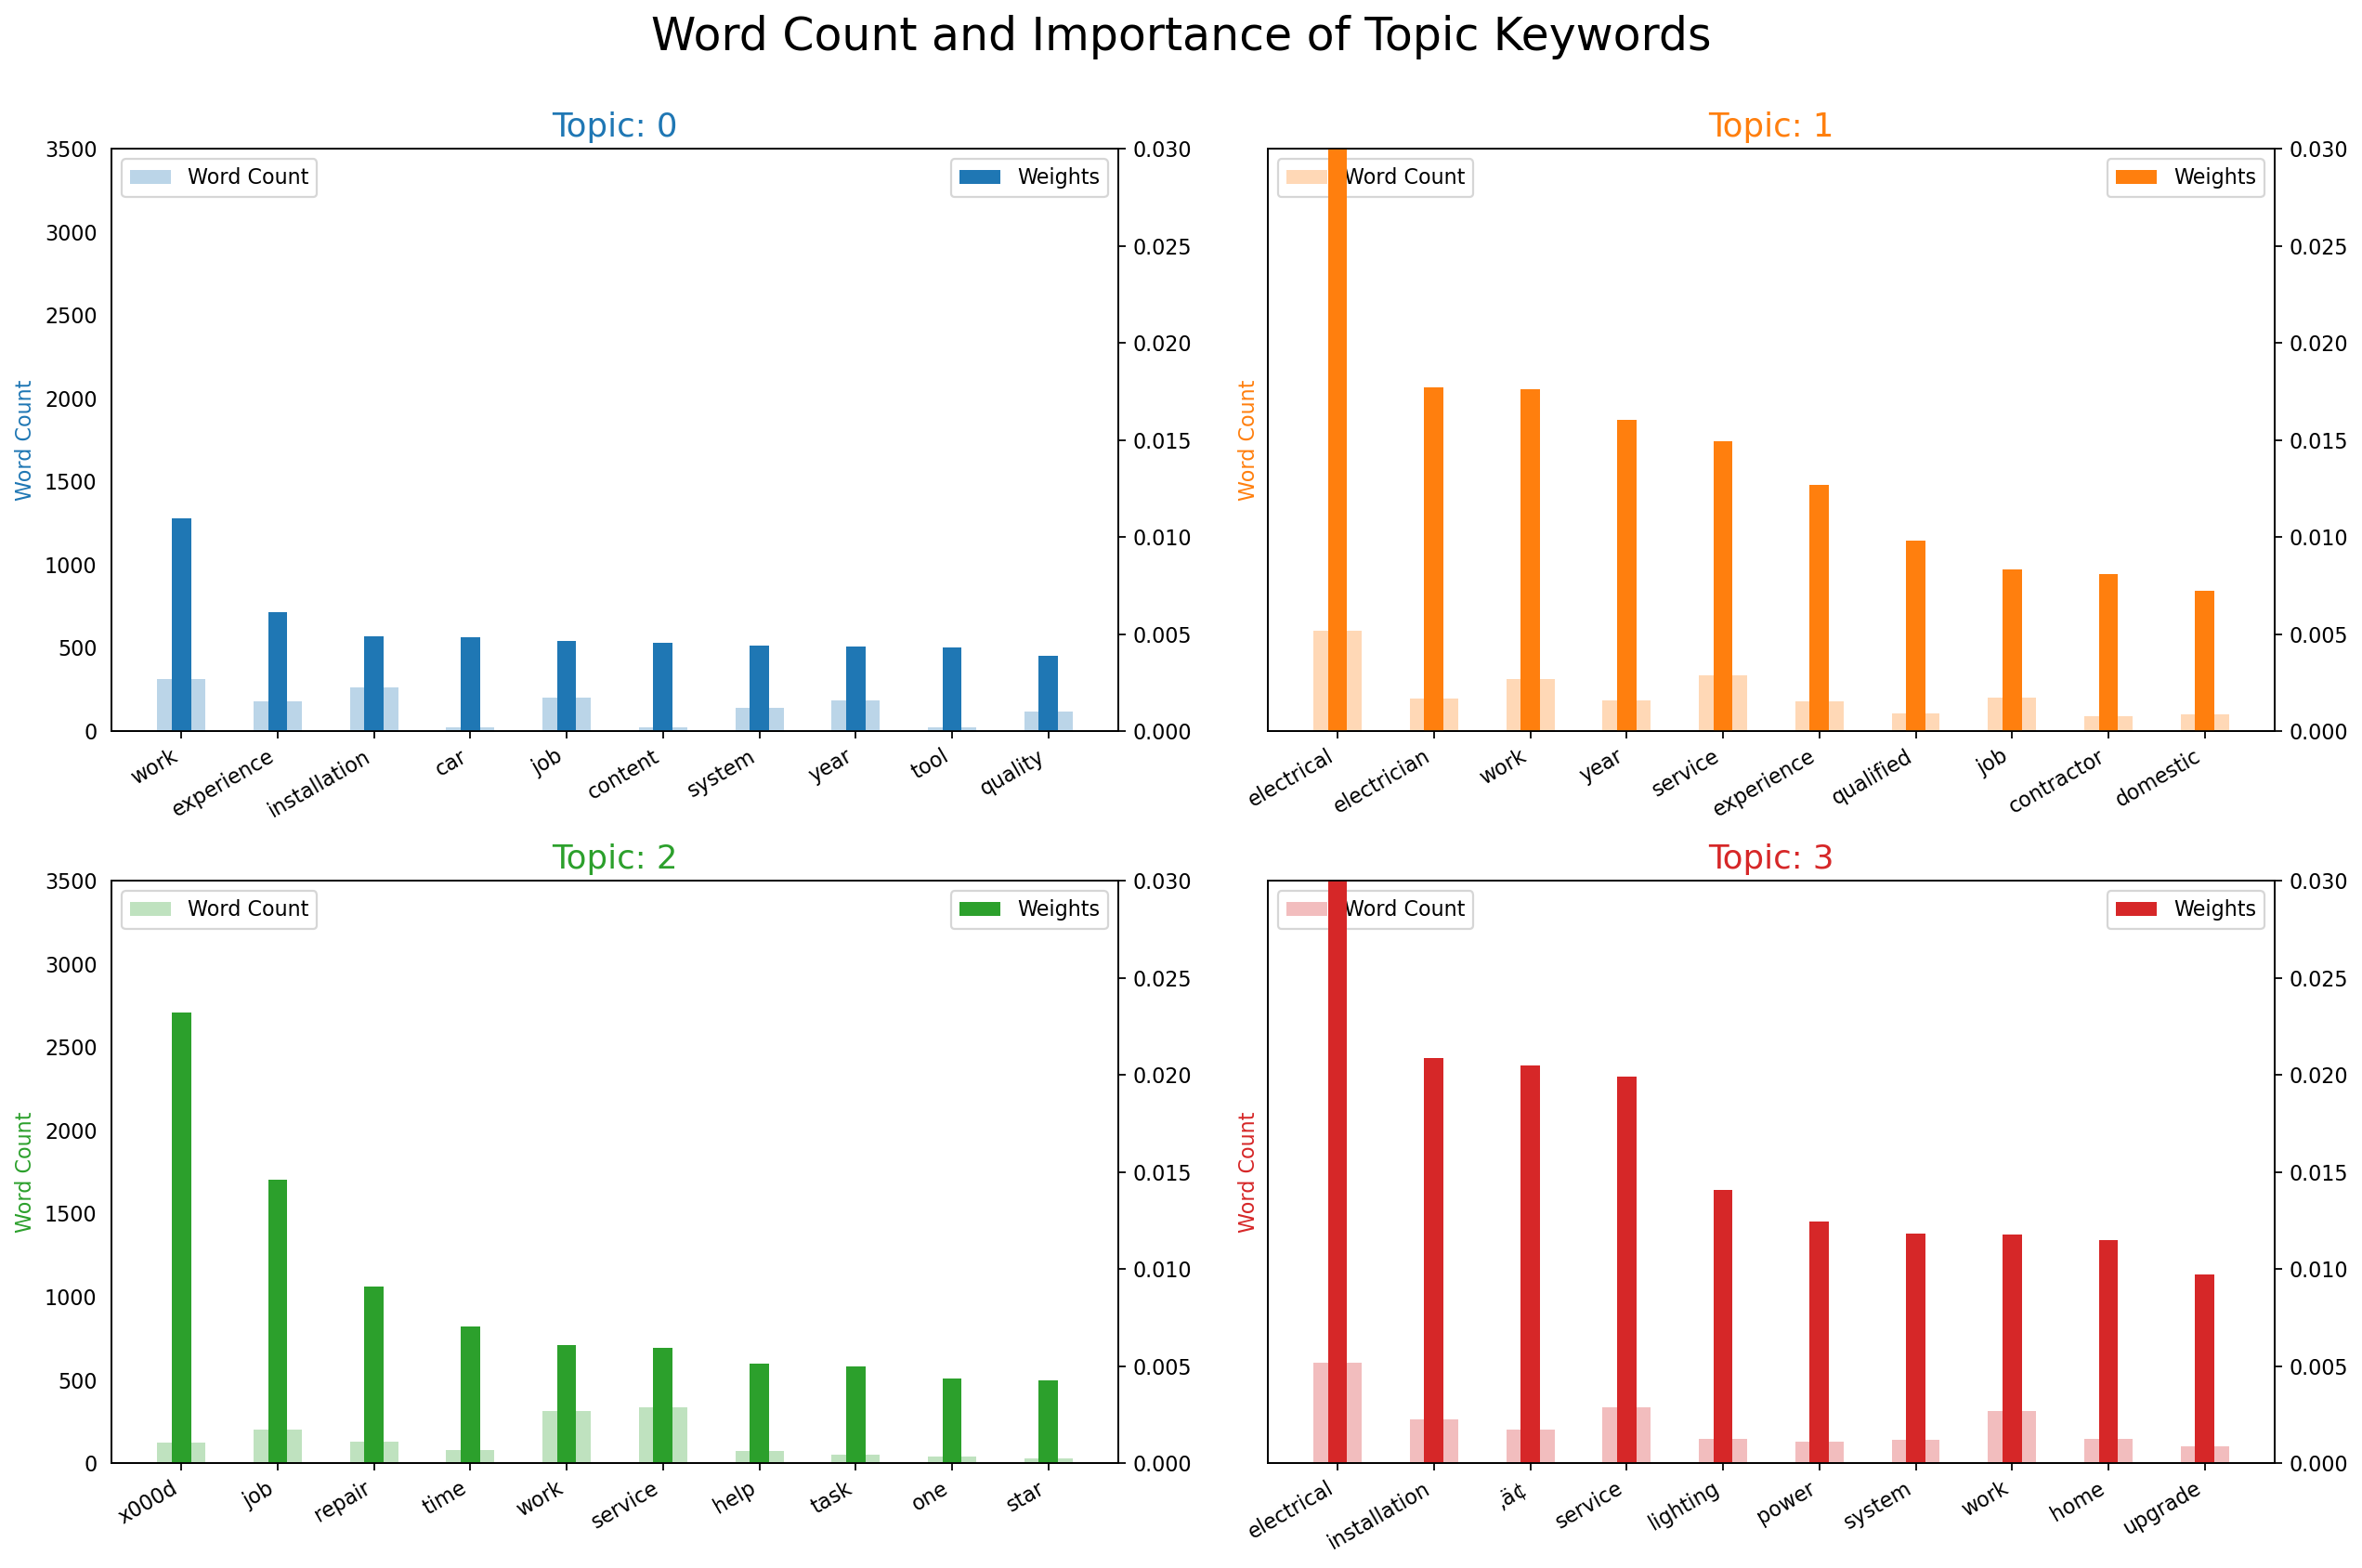

In [39]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# t-SNE Clustering Chart

In [63]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

# pyLDAVis

In [41]:
import pyLDAvis.gensim_models


/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.151735  0.004138       1        1  40.217297
1      0.077098 -0.027245       2        1  26.067172
2     -0.135513 -0.086007       3        1  19.202146
0     -0.093320  0.109113       4        1  14.513384, topic_info=             Term        Freq       Total Category  logprob  loglift
8      electrical  518.000000  518.000000  Default  30.0000  30.0000
2197        x000d   96.000000   96.000000  Default  29.0000  29.0000
433           ‚ä¢  178.000000  178.000000  Default  28.0000  28.0000
89       lighting  129.000000  129.000000  Default  27.0000  27.0000
132   electrician  166.000000  166.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
0          always    8.939583   56.335821   Topic4  -5.8590   0.0893
3        customer    9.668415   99.995134   Topic4  -5.7807  -0.4062
527         price    7.289990   33.694964   Topic4  -6.0630   0.3993
351       working    7.304107   42.738256   Topic4  -6.0611   0.1634
1064           im    7.240021   39.085241   Topic4  -6.0699   0.2440

[304 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
347       1  0.187869           10
347       2  0.590446           10
347       3  0.187869           10
347       4  0.053677           10
508       1  0.298437          100
...     ...       ...          ...
2303      2  0.880101       ‚≠êô∏è
2303      4  0.135400       ‚≠êô∏è
4187      4  0.656810  üë©‚äçüéì
4079      4  0.791728         üîµ
3047      4  0.882353         üîù

[521 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [52]:
def predict(new_text):
  if new_text is not None and str(new_text).strip() != '':
    cleaned_data = clean(new_text).split()
    bow_vector = dictionary.doc2bow(cleaned_data)
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    for index, score in sorted(ldamodel[bow_vector], key=lambda tup: -1*tup[1]):
      res = preprocess_string(ldamodel.print_topic(index, 5), filters)
      return res
  else:
    return None

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
electric_data

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      We are a small electrical business with decade...
1      Need a qualified electrician/heating and cooli...
2      Years in business: 36\nNumber of employees: 3\...
3      All types of Electrical Works\nIndustrial, Com...
6                               Contractor's Lic # 30614
                             ...                        
631    Over 30 years ICT experience. Cisco certified....
632    Hello,\nI have plenty of experience in DIY stu...
633    Hi I‚Äôm Jarrod. \nI am a refrigeration and ai...
634    I own a local, family owned electrical busines...
635    [Content Moderated] is a registered electrical...
Name: Description, Length: 615, dtype: object

In [53]:
for d in electric_data:
  print(predict(d))

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['xd', 'job', 'repair', 'time', 'work']
['electrical', 'electric

['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['xd', 'job', 'repair', 'time', 'work']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['xd', 'job', 'repair', 'time', 'work']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']


In [55]:
coherence_model_lda = CoherenceModel(model=ldamodel, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score: ', coherence_lda)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Coherence Score:  0.47955136217943245


In [43]:
coherence_model_lda

In [30]:
coherence_model_multicore = CoherenceModel(model=lda_model_multi, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_multicore = coherence_model_multicore.get_coherence()
print('\nMulticore Coherence Score: ', coherence_multicore)

NameError: name 'lda_model_multi' is not defined